# Transformation

width  144 height  144


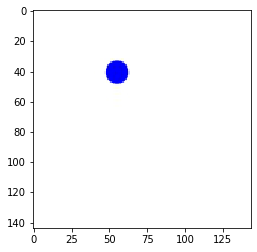

In [1]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import *

np.random.seed(37)

image = Image.open('./shapes/train/circle/0001.jpg', 'r')
print('width ', image.width, 'height ', image.height)

plt.imshow(image)

## PIL transforms

### Center crop

Text(0.5, 1.0, 'Zoom Out')

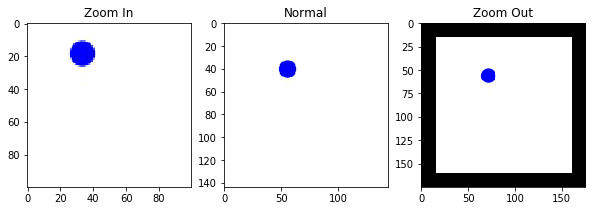

In [2]:
t1 = CenterCrop(100)
t2 = CenterCrop(144)
t3 = CenterCrop(175)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))
ax[2].imshow(t3(image))

ax[0].set_title('Zoom In')
ax[1].set_title('Normal')
ax[2].set_title('Zoom Out')

### ColorJitter

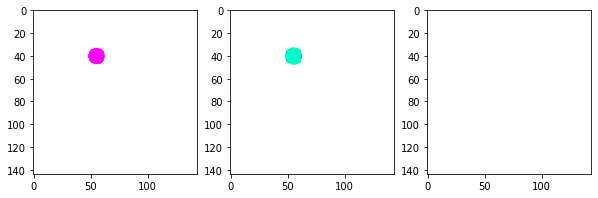

In [3]:
t1 = ColorJitter(brightness=10, contrast=0, saturation=0, hue=0.5)
t2 = ColorJitter(brightness=10, contrast=0, saturation=0.1, hue=0.5)
t3 = ColorJitter(brightness=10, contrast=0.5, saturation=0.1, hue=0.5)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))
ax[2].imshow(t3(image))

### Grayscale

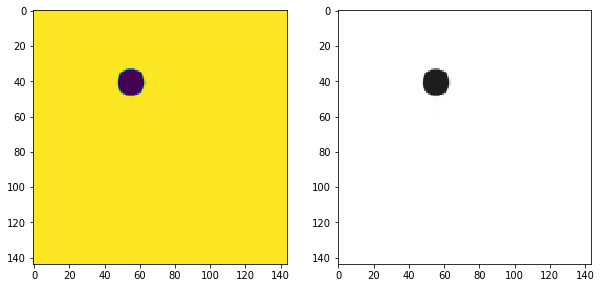

In [8]:
t1 = Grayscale(num_output_channels=1)
t2 = Grayscale(num_output_channels=3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

## Tensor transforms

## Conversion transforms

## Generic transforms

## Functional transforms